# Business Objective:
### Predict the apple stock market price for next 30 days. 
There are Open, High, Low and Close price has been given for each day starting from 2012 to 2019 for Apple stock. 
+ Split the last year into a test set- can you build a model to predict stock price?
+ Find trends in short term, or long term trends?
+ Understand how it is impacted from external factors or any big external events?
+ Forecast for next 30 days.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
#reading the data 
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# EDA

In [3]:
#looking if there is any missing values  
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#looking if there is any duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2006    False
2007    False
2008    False
2009    False
2010    False
Length: 2011, dtype: bool

In [5]:
#information about all the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [7]:
#df['Date'] = pd.to_datetime(df['Date'])
# df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low','Adj Close','Volume'], inplace=True)

<AxesSubplot:>

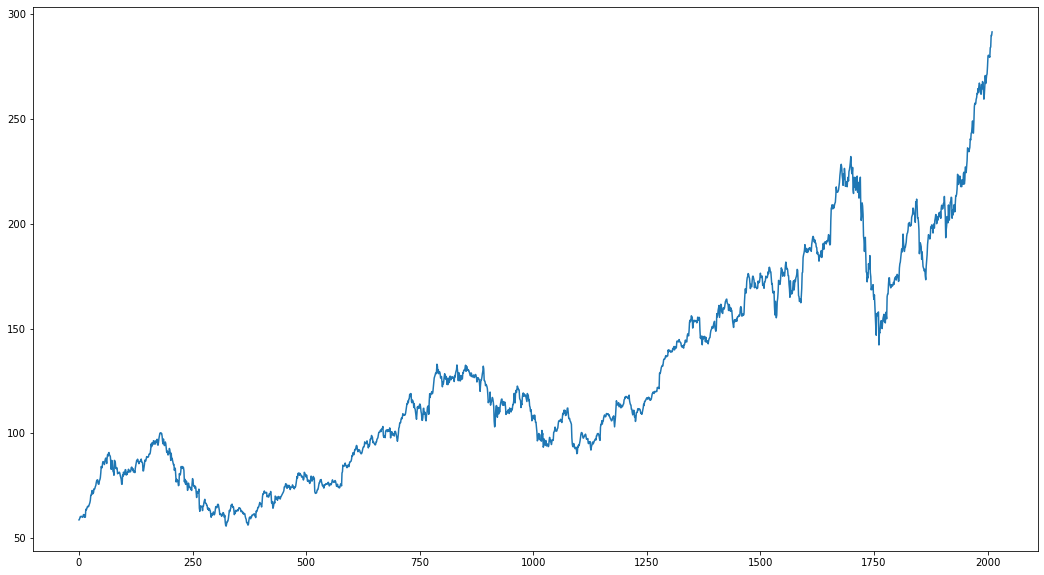

In [8]:
#ploting the data with using the "Close" .to see the rise and fall of the stock
df['Close'].plot(figsize=(18,10))

# Time Series Component

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Close decomposition')

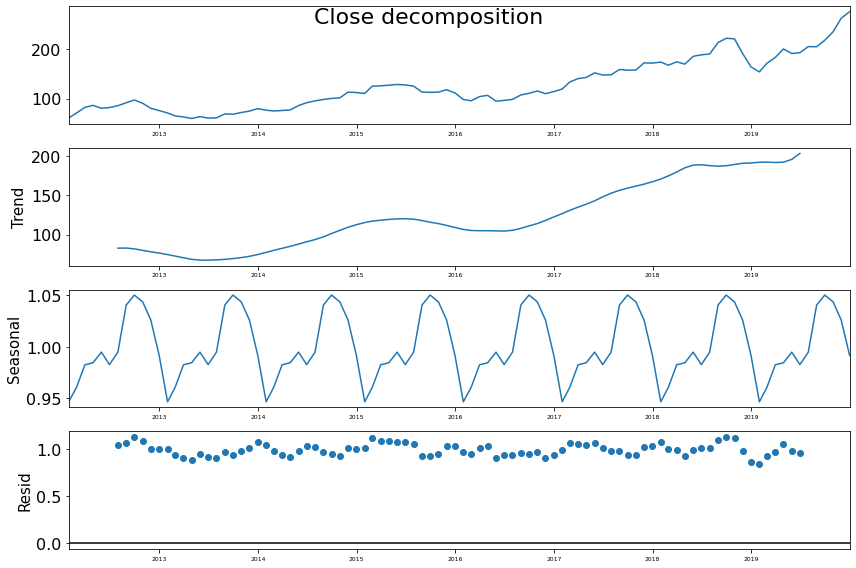

In [10]:
# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Close decomposition', fontsize=22)

From the above plot we can see that, the trand component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time & we can see there is repeating patterns so we can say that seasonality is present on our data.


# Testing For Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Close'])

H0: Data is Stationarity

V/S

H1: Data is Non-Stationarity

In [13]:
def adf_test(series, title=''):
    
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

adf_test(df['Close'],title='') 

ADF test statistic         1.219370
p-value                    0.996117
# lags used                9.000000
# observations          2001.000000
critical value (1%)       -3.433622
critical value (5%)       -2.862985
critical value (10%)      -2.567540
Fail to reject the null hypothesis
Data is non-stationary


In [14]:
# Differencing y(t)=y(t)-y(t-1)
df['Close First Difference'] = df['Close'] -df['Close'].shift(1)

In [15]:
## Again test dickey fuller test for first differencing
adf_test(df['Close First Difference'].dropna())

ADF test statistic     -1.362553e+01
p-value                 1.763123e-25
# lags used             8.000000e+00
# observations          2.001000e+03
critical value (1%)    -3.433622e+00
critical value (5%)    -2.862985e+00
critical value (10%)   -2.567540e+00
Reject the null hypothesis
Data is stationary


In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

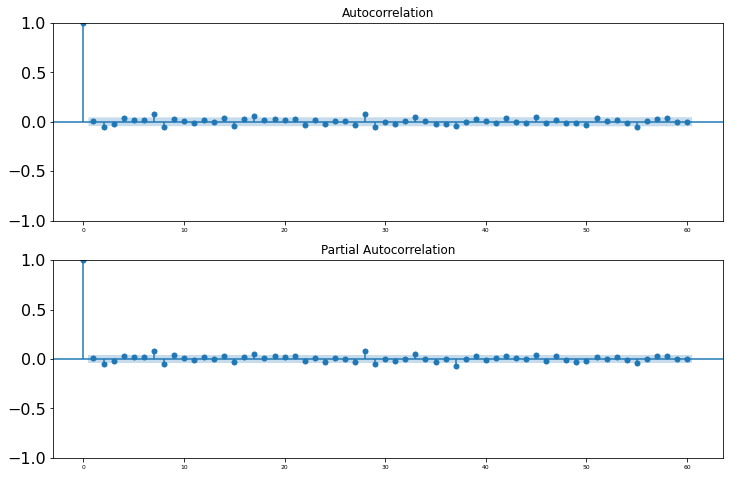

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Close First Difference'].iloc[31:],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Close First Difference'].iloc[31:],lags=60,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

You can see that a blue area in the ACF & PACF plots indicate the 95% confidence interval & Is an indicator of the significant threshold.

From the plot we choose p=1 & q=1

In [18]:
# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
        
adf_test(y['Close'],title='') 

ADF test statistic       0.512110
p-value                  0.985237
# lags used              1.000000
# observations          94.000000
critical value (1%)     -3.501912
critical value (5%)     -2.892815
critical value (10%)    -2.583454
Fail to reject the null hypothesis
Data is non-stationary


In [19]:
# Differencing y(t)=y(t)-y(t-1)
y['Close First Difference'] = y['Close'] -y['Close'].shift(1)

In [20]:
## Again test dickey fuller test for first differencing
adf_test(y['Close First Difference'].dropna())

ADF test statistic     -6.555009e+00
p-value                 8.660413e-09
# lags used             0.000000e+00
# observations          9.400000e+01
critical value (1%)    -3.501912e+00
critical value (5%)    -2.892815e+00
critical value (10%)   -2.583454e+00
Reject the null hypothesis
Data is stationary


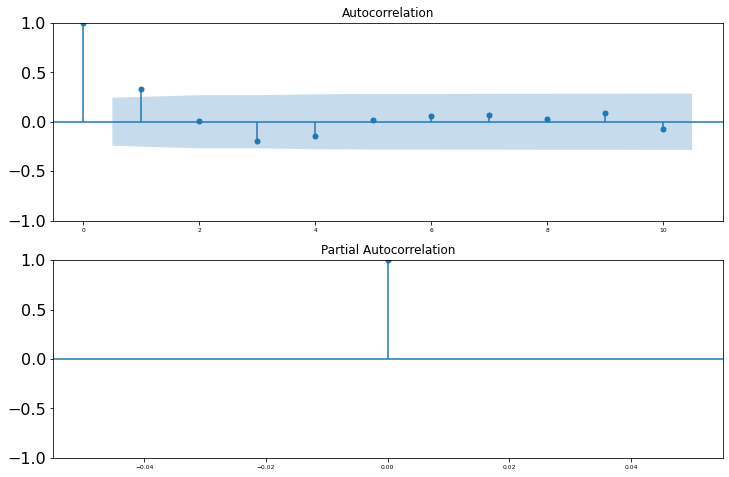

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(y['Close First Difference'].iloc[31:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(y['Close First Difference'].iloc[:31],lags=10,ax=ax2)

From the above plot we can see that,the ACF & PACF plot start with a lag zero(0) which is the correlation of the time series with itself & therefore results in correlation of 1 .

From above plot we take p=2 & q=2

# Dividing the data into train and testing , last year data as a test data and remaning as traning data

In [22]:
# Split data into train and test
df_train=df.iloc[:1760]   
df_test=df.iloc[1760:] 

# ARIMA MODEL

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [25]:
model = sm.tsa.arima.ARIMA(df_train['Close'], order=(2,1,1))
model_fit = model.fit()

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1760
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3638.647
Date:                Wed, 08 Feb 2023   AIC                           7285.295
Time:                        19:01:43   BIC                           7307.185
Sample:                             0   HQIC                          7293.385
                               - 1760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2293      0.306      0.751      0.453      -0.369       0.828
ar.L2         -0.0553      0.017     -3.353      0.001      -0.088      -0.023
ma.L1         -0.1964      0.308     -0.638      0.524      -0.800       0.407
sigma2         3.6667      0.064     57.652      0.000       3.542       3.791
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2972.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above analysis, we can see that the P-value of ar.L1 model & ma.L1 model is 0.00 which is less than 0.05, that mean's our data has highly significant

<AxesSubplot:>

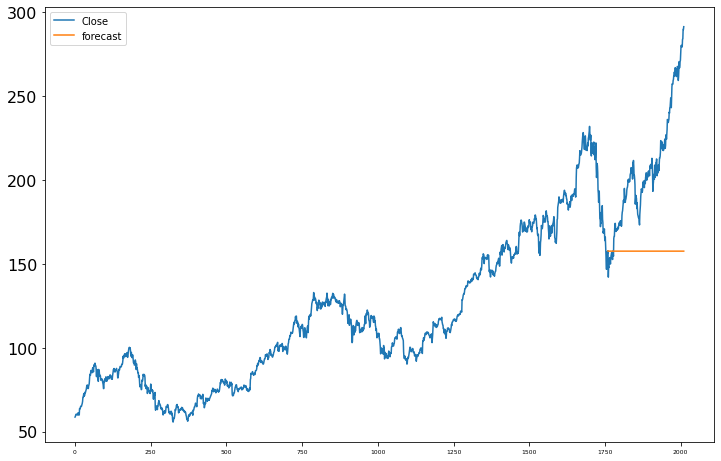

In [27]:
#Ploting the ARIMA model for visualization.
df['forecast']=model_fit.predict(start=1760,end=2010)

df[['Close','forecast']].plot(figsize=(12,8))

In [28]:
df['forecast']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2006    157.684892
2007    157.684892
2008    157.684892
2009    157.684892
2010    157.684892
Name: forecast, Length: 2011, dtype: float64

# Checking MAPE AND RMSE

In [29]:
#Mean Absolute Precentage Error(mape)
mape = np.mean((df['forecast']-df['Close'])/np.abs(df['Close']))
mape

-0.2216770701595285

In [30]:
#Root Mean Squared Error (RMSE)
rmse = np.mean((df['forecast']-df['Close'])**2)**.5
rmse

60.719952523158334

### Seasonal Differencing 

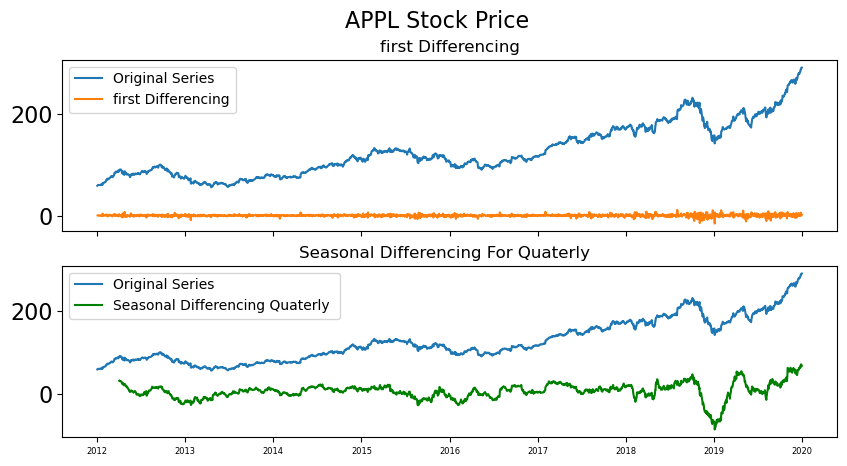

In [31]:
data = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col='Date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data["Close"], label='Original Series')
axes[0].plot(data["Close"].diff(1), label='first Differencing')
axes[0].set_title('first Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing by Quaterly 
axes[1].plot(data["Close"], label='Original Series')
axes[1].plot(data["Close"].diff(63), label='Seasonal Differencing Quaterly ', color='green')
axes[1].set_title('Seasonal Differencing For Quaterly  ')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('APPL Stock Price', fontsize=16)
plt.show()


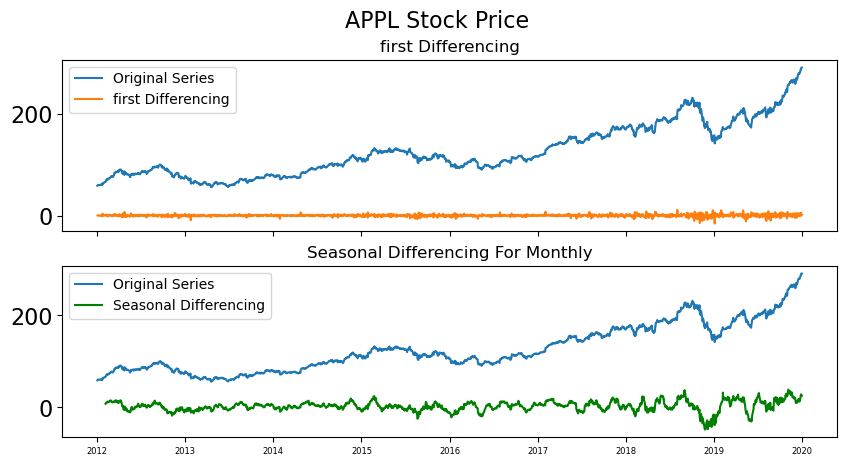

In [32]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data["Close"], label='Original Series')
axes[0].plot(data["Close"].diff(1), label='first Differencing')
axes[0].set_title('first Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing for Monthly
axes[1].plot(data["Close"], label='Original Series')
axes[1].plot(data["Close"].diff(23), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing For Monthly')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('APPL Stock Price', fontsize=16)
plt.show()

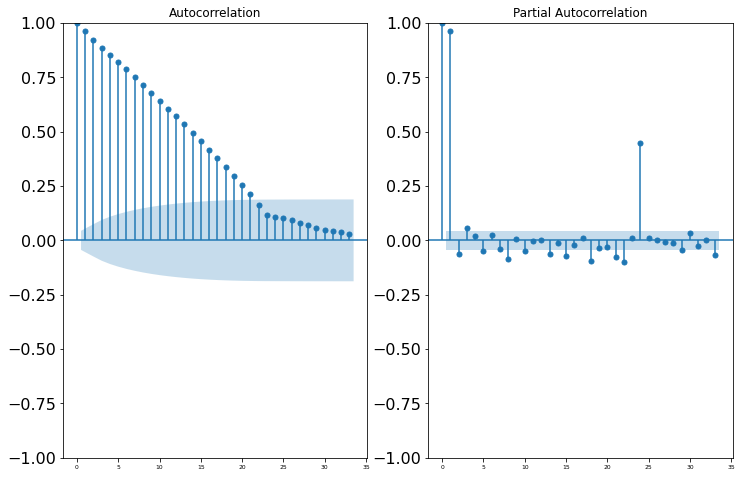

In [33]:
fig, axes = plt.subplots(1, 2, sharex=True)
plot_acf(df['Close'].diff(23).dropna(), ax=axes[0])
plot_pacf(df['Close'].diff(23).dropna(), ax=axes[1])
plt.show()

# BUILDING SARIMAX MODEL FOR MONTHLY(23days)

In [34]:
model1=sm.tsa.statespace.SARIMAX(df_train['Close'], order=(1,1,1),seasonal_order=(1,1,1,23))
model1_fit=model1.fit()

In [35]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 23)   Log Likelihood               -3640.854
Date:                            Wed, 08 Feb 2023   AIC                           7291.707
Time:                                    19:01:58   BIC                           7319.004
Sample:                                         0   HQIC                          7301.802
                                           - 1760                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7790      0.133     -5.836      0.000      -1.041      -0.517
ma.L1          0.8073      0.125      6.435      0.000       0.561       1.053
ar.S.L23       0.0258      0.018      1.406      0.160      -0.010       0.062
ma.S.L23      -0.9767      0.013    -76.507      0.000      -1.002      -0.952
sigma2         3.7317      0.066     56.348      0.000       3.602       3.861
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2583.73
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

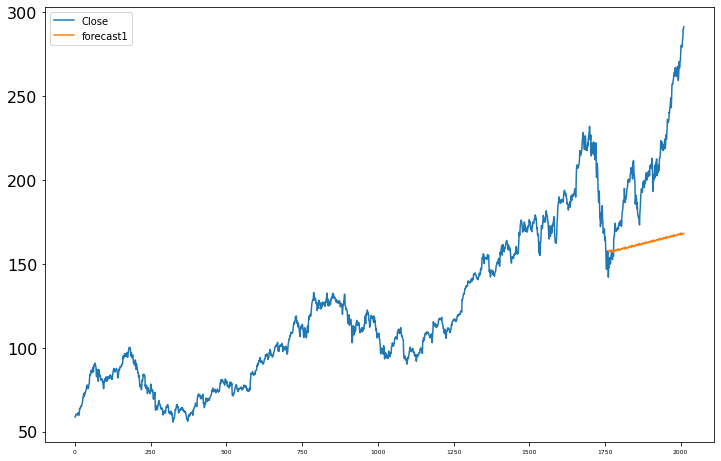

In [36]:
#Ploting the SARIMAX MONTHLY model for visualization.
df['forecast1']=model1_fit.predict(start=1761,end=2010,dynamic=True,exog=None)
df[['Close','forecast1']].plot(figsize=(12,8))

In [37]:
df["forecast1"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2006    168.082929
2007    168.122311
2008    167.885145
2009    168.061916
2010    168.335244
Name: forecast1, Length: 2011, dtype: float64

In [38]:
#Mean Absolute Precentage Error(mape)
mape1 = np.mean((df['forecast1']-df['Close'])/np.abs(df['Close']))
mape1

-0.2002304328207261

In [39]:
#Root Mean Squared Error (RMSE)
rmse1 = np.mean((df['forecast1']-df['Close'])**2)**.5
rmse1

55.02046319739757

# Ploting ACF AND PACF plot for quaterly difference 

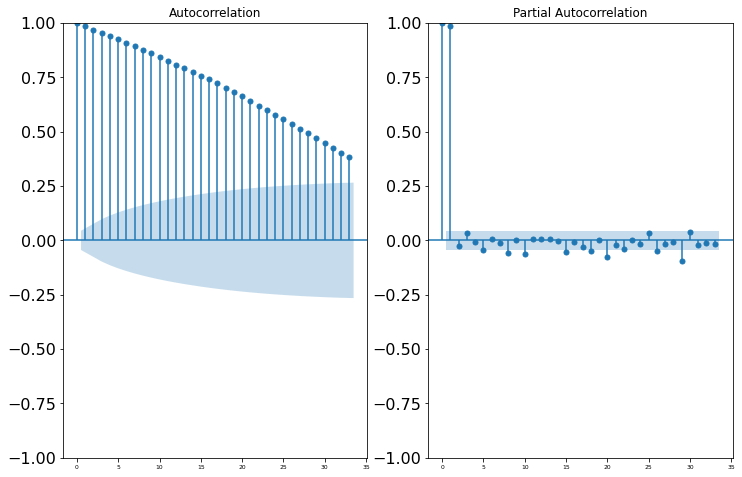

In [40]:
fig, axes = plt.subplots(1, 2, sharex=True)
plot_acf(df['Close'].diff(63).dropna(), ax=axes[0])
plot_pacf(df['Close'].diff(63).dropna(), ax=axes[1])
plt.show()

# BUILDING SARIMAX MODEL FOR QUARTERLY(63days)

In [41]:
model2=sm.tsa.statespace.SARIMAX(df_train['Close'], order=(1,1,1),seasonal_order=(1,1,1,63))


In [42]:
model2_fit=model2.fit()

In [43]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1760
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 63)   Log Likelihood               -3606.582
Date:                            Wed, 08 Feb 2023   AIC                           7223.165
Time:                                    19:05:22   BIC                           7250.345
Sample:                                         0   HQIC                          7233.228
                                           - 1760                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8231      0.111     -7.401      0.000      -1.041      -0.605
ma.L1          0.8498      0.104      8.209      0.000       0.647       1.053
ar.S.L63      -0.0151      0.029     -0.520      0.603      -0.072       0.042
ma.S.L63      -0.8881      0.018    -49.625      0.000      -0.923      -0.853
sigma2         3.8824      0.069     56.047      0.000       3.747       4.018
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2513.06
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

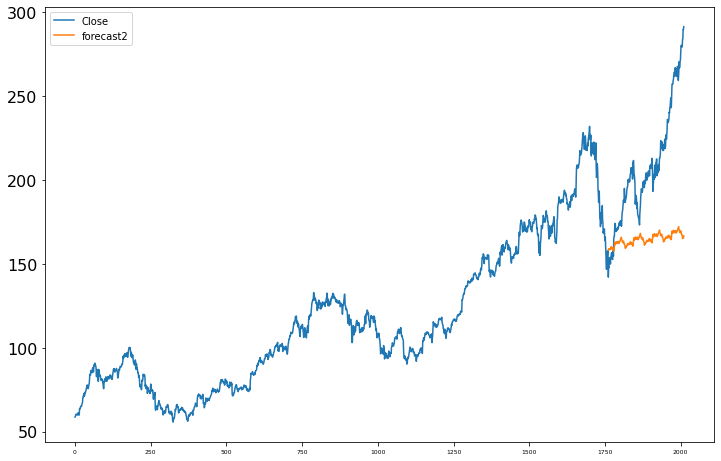

In [44]:
df['forecast2']=model2_fit.predict(start=1761,end=2010,dynamic=True,exog=None)
df[['Close','forecast2']].plot(figsize=(12,8))

In [45]:
df["forecast2"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2006    165.221510
2007    165.549501
2008    166.407240
2009    165.711985
2010    166.728751
Name: forecast2, Length: 2011, dtype: float64

In [46]:
#Mean Absolute Precentage Error(mape)
mape2 = np.mean((df['forecast2']-df['Close'])/np.abs(df['Close']))
mape2

-0.18936298148477476

In [47]:
#Root Mean Squared Error (RMSE)
rmse2 = np.mean((df['forecast2']-df['Close'])**2)**.5
rmse2

53.77839827898213

# FUTURE Prediction

In [48]:
from pandas.tseries.offsets import DateOffset

In [49]:
futuredate = [DateOffset(days= x) for x in range (0,30)]

In [50]:
Future_dates_df=pd.DataFrame(index=futuredate[1:],columns=df.columns)

In [51]:
df

,Date,Close,Close First Difference,forecast,forecast1,forecast2
0,2012-01-03,58.747143,NaN,NaN,NaN,NaN
1,2012-01-04,59.062859,0.315716,NaN,NaN,NaN
2,2012-01-05,59.718571,0.655712,NaN,NaN,NaN
3,2012-01-06,60.342857,0.624286,NaN,NaN,NaN
4,2012-01-09,60.247143,-0.095714,NaN,NaN,NaN
...,...,...,...,...,...,...
2006,2019-12-23,284.000000,4.559998,157.684892,168.082929,165.221510
2007,2019-12-24,284.269989,0.269989,157.684892,168.122311,165.549501
2008,2019-12-26,289.910004,5.640015,157.684892,167.885145,166.407240
2009,2019-12-27,289.799988,-0.110016,157.684892,168.061916,165.711985


In [52]:
future_df=pd.concat([df,Future_dates_df],ignore_index=True)

<AxesSubplot:>

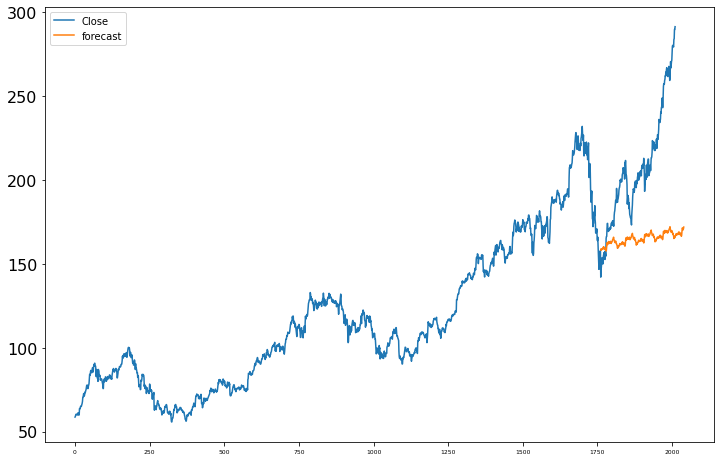

In [53]:
future_df['forecast']=model2_fit.predict(start=1761,end=2039)
future_df[['Close','forecast']].plot(figsize=(12,8))

In [54]:
# 30 day's predicted values
future_df['forecast'].tail(30)

2010    166.728751
2011    166.637765
2012    167.083908
2013    167.463950
2014    168.121030
2015    167.291348
2016    167.456933
2017    167.638339
2018    168.012834
2019    167.570799
2020    167.706624
2021    168.788990
2022    168.515503
2023    169.167015
2024    168.887377
2025    167.655349
2026    167.600348
2027    168.175634
2028    168.503015
2029    167.612473
2030    167.182061
2031    166.537926
2032    167.057778
2033    169.376161
2034    171.450547
2035    171.557379
2036    170.201133
2037    170.547970
2038    170.995103
2039    172.037185
Name: forecast, dtype: float64

# Save the best model:

In [55]:
import pickle
filename='trained_model.sav'

In [56]:
pickle.dump(model2,open(filename,'wb'))